In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_US Economy.csv')
df

,user_country,source,content,date
0,"Rural Hall, North Carolina, USA",Twitter Web App,#politics ROBERT REICH on POLITICS and MORE #D...,2020-09-29T23:48:53+00:00
1,"Seattle, WA",Hootsuite Inc.,"In its #nowcast dated Sept. 29th, 2020, @TheEI...",2020-09-29T23:48:18+00:00
2,NaN,Twitter Web App,@nytimes Seems to have all started going backw...,2020-09-29T23:47:38+00:00
3,NaN,Twitter for Android,No one: The US Economy: 🎵Now from the top. Mak...,2020-09-29T23:46:37+00:00
4,TOOK ANOTHER 100 REAL # +773👇,Twitter for Android,@CreasonJana @usmade1001Deb Sunday 4:30am on T...,2020-09-29T23:45:39+00:00
...,...,...,...,...
580,🇦🇺 Australia,Twitter Web App,@paulkrugman Spending eg fixing bridges (badly...,2020-09-29T00:13:15+00:00
581,NaN,Twitter Web App,Illegal immigrants do more for the US economy ...,2020-09-29T00:10:59+00:00
582,@ Bitcoin + Ethereum chains,Twitter Web App,Trump = tax cuts = bigger deficits Biden = mor...,2020-09-29T00:08:41+00:00
583,NaN,Twitter for Android,@ATBTy2 @Bonespurs2020 @KeysToTheCourt1 @Jason...,2020-09-29T00:07:43+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

22291
['#politics', 'robert', 'reich', 'on', 'politics', 'and', 'more', '#donaldtrump', '#foxnews', '#robertreich', '#useconomy', '#worstpresidentinhistory', 'https://t.co/ib00fx2eutin', 'its', '#nowcast', 'dated', 'sept', '.', '29th', ',']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 220.05%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

9226
['robert', 'reich', 'politics', 'dated', 'sept', 'says', 'weakened', 'quarter-on-quarter', 'last', 'week', 'compared', 'week', 'ending', 'sept', 'seems', 'started', 'going', 'backwards', 'around', 'time']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 61),
 ('@joebiden', 14),
 ('@gopleader', 7),
 ('@gop', 5),
 ('@youtube', 5),
 ('@donaldjtrumpjr', 4),
 ('@rogerfritz7', 4),
 ('@nytimes', 3),
 ('@aoc', 3),
 ('@abc', 3),
 ('@teamtrump', 3),
 ('@northmantrader', 3),
 ('@breitbartnews', 3),
 ('@barackobama', 3),
 ('@eg4usa', 3),
 ('@songldr', 3),
 ('@jhtx77', 3),
 ('@gooner1jdc', 3),
 ('@klb4usa', 3),
 ('@dfbharvard', 3)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"Rural Hall, North Carolina, USA",Twitter Web App,#politics ROBERT REICH on POLITICS and MORE #D...,2020-09-29T23:48:53+00:00,Positive
1,"Seattle, WA",Hootsuite Inc.,"In its #nowcast dated Sept. 29th, 2020, @TheEI...",2020-09-29T23:48:18+00:00,Neutral
2,NaN,Twitter Web App,@nytimes Seems to have all started going backw...,2020-09-29T23:47:38+00:00,Neutral
3,NaN,Twitter for Android,No one: The US Economy: 🎵Now from the top. Mak...,2020-09-29T23:46:37+00:00,Positive
4,TOOK ANOTHER 100 REAL # +773👇,Twitter for Android,@CreasonJana @usmade1001Deb Sunday 4:30am on T...,2020-09-29T23:45:39+00:00,Negative
...,...,...,...,...,...
580,🇦🇺 Australia,Twitter Web App,@paulkrugman Spending eg fixing bridges (badly...,2020-09-29T00:13:15+00:00,Negative
581,NaN,Twitter Web App,Illegal immigrants do more for the US economy ...,2020-09-29T00:10:59+00:00,Neutral
582,@ Bitcoin + Ethereum chains,Twitter Web App,Trump = tax cuts = bigger deficits Biden = mor...,2020-09-29T00:08:41+00:00,Positive
583,NaN,Twitter for Android,@ATBTy2 @Bonespurs2020 @KeysToTheCourt1 @Jason...,2020-09-29T00:07:43+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    341
Negative    142
Neutral     102
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 58.29%
Percentage of neutral tweets: 17.44%
Percentage of negative tweets: 24.27%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

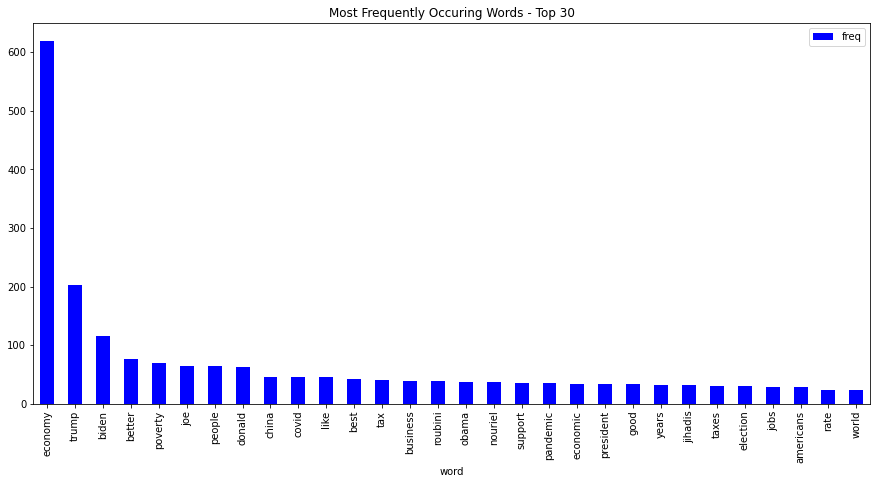

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

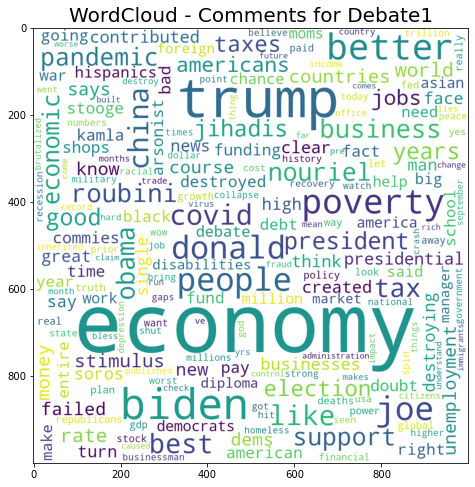

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

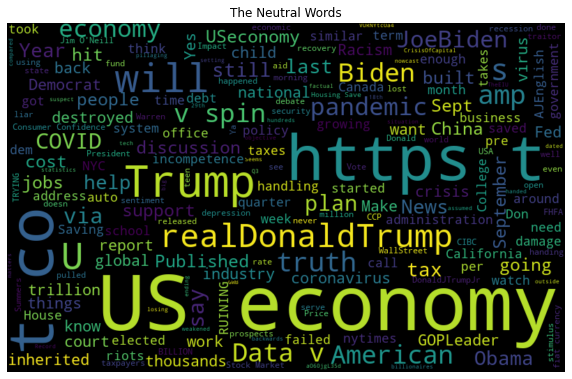

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

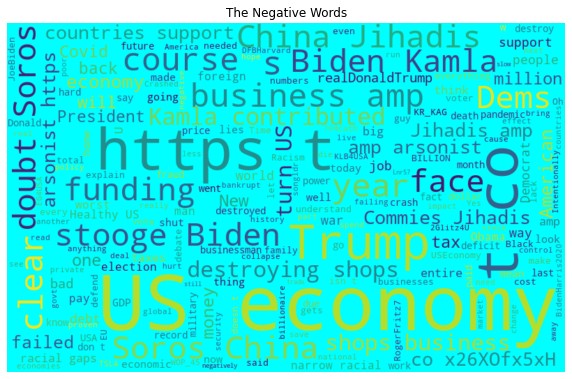

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

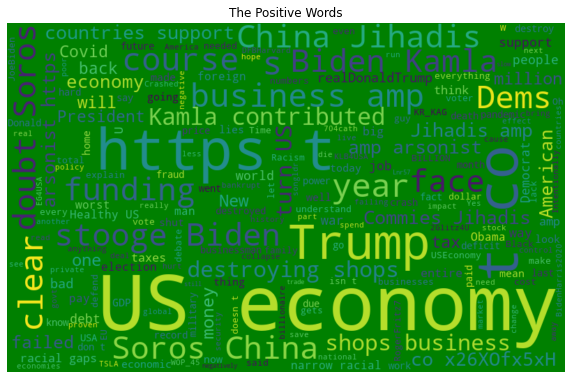

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,#politics ROBERT REICH on POLITICS and MORE #D...,Positive
1,"In its #nowcast dated Sept. 29th, 2020, @TheEI...",Neutral
2,@nytimes Seems to have all started going backw...,Neutral
3,No one: The US Economy: 🎵Now from the top. Mak...,Positive
4,@CreasonJana @usmade1001Deb Sunday 4:30am on T...,Negative
...,...,...
580,@paulkrugman Spending eg fixing bridges (badly...,Negative
581,Illegal immigrants do more for the US economy ...,Neutral
582,Trump = tax cuts = bigger deficits Biden = mor...,Positive
583,@ATBTy2 @Bonespurs2020 @KeysToTheCourt1 @Jason...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,politics robert reich on politics and more don...
1,Neutral,in its nowcast dated sept th says the us econo...
2,Neutral,seems to have all started going backwards arou...
3,Positive,no one the us economy now from the top make it...
4,Negative,sunday am on turner classics is inflation adol...
...,...,...
580,Negative,spending eg fixing bridges badly needed may se...
581,Neutral,illegal immigrants do more for the us economy ...
582,Positive,trump tax cuts bigger deficits biden more heal...
583,Positive,the us economy has done better than most durin...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,politics robert reich on politics and more don...
3,Positive,no one the us economy now from the top make it...
6,Positive,maybe biden will shut down the us economy like...
11,Positive,the dow jones index pretty much the same growt...
15,Positive,joe senile biden has decades of failures for a...
...,...,...
563,Negative,wrong the us economy was in a downfall prior t...
565,Negative,racism has cost us economy trillion report do ...
570,Negative,so us economy is bad
577,Negative,it s intentional trump seeks revenge against a...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,politics robert reich on politics and more don...
3,1,no one the us economy now from the top make it...
6,1,maybe biden will shut down the us economy like...
11,1,the dow jones index pretty much the same growt...
15,1,joe senile biden has decades of failures for a...
...,...,...
563,0,wrong the us economy was in a downfall prior t...
565,0,racism has cost us economy trillion report do ...
570,0,so us economy is bad
577,0,it s intentional trump seeks revenge against a...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(362, 2)
(121, 2)


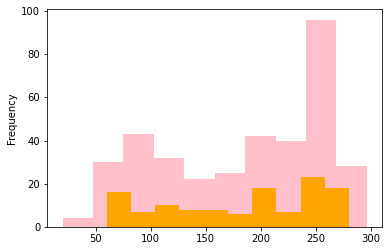

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(141466, 240060)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('for', 0.9582692384719849),
 ('something', 0.9420403838157654),
 ('times', 0.9163057804107666),
 ('always', 0.9142666459083557),
 ('myth', 0.9103633165359497),
 ('handle', 0.9075250029563904),
 ('politics', 0.9074925184249878),
 ('democrat', 0.906213641166687),
 ('recessions', 0.9013068675994873),
 ('traitortrump', 0.8939032554626465)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('rate', -0.37129583954811096),
 ('economic', -0.37259912490844727),
 ('homeless', -0.3777466416358948),
 ('apocalypse', -0.37911131978034973),
 ('brutalized', -0.3813565969467163),
 ('ever', -0.38548800349235535),
 ('best', -0.3903392553329468),
 ('reckon', -0.3985329270362854),
 ('created', -0.40512192249298096),
 ('california', -0.408294141292572)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(362, 500)
(362,)
(121, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9972375690607734
Validation Accuracy : 0.6033057851239669
F1 score : 0.6756756756756757
[[23 17]
 [31 50]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9972375690607734
Validation Accuracy : 0.4214876033057851
f1 score : 0.396551724137931
[[28 12]
 [58 23]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9972375690607734
Validation Accuracy : 0.4628099173553719
f1 score : 0.49612403100775193
[[24 16]
 [49 32]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9530386740331491
Validation Accuracy : 0.6694214876033058
f1 score : 0.801980198019802
[[ 0 40]
 [ 0 81]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 the k shaped recovery is under way by the us economy has bifurcated in the pandemic there is now a vast divide btwn rich poor tech non tech public co smbs my partner aman looks at data on companies people and kids 

First sample after preprocessing: 
 [  1 465 236   7 116 182  45   1   2   3  19   9   1  72 117   7  74   8
 237 308 466 467 125 468  63 360  22 361  37   6   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
3/3 - 1s - loss: 0.6763 - accuracy: 0.5969 - val_loss: 0.6534 - val_accuracy: 0.6757
Epoch 2/20
3/3 - 0s - loss: 0.6174 - accuracy: 0.7231 - val_loss: 0.6307 - val_accuracy: 0.6757
Epoch 3/20
3/3 - 0s - loss: 0.5942 - accuracy: 0.7231 - val_loss: 0.6277 - val_accuracy: 0.6757
Epoch 4/20
3/3 - 0s - loss: 0.5860 - accuracy: 0.7231 - val_loss: 0.6345 - val_accuracy: 0.6757
Epoch 5/20
3/3 - 0s - loss: 0.5902 - accuracy: 0.7231 - val_loss: 0.6299 - val_accuracy: 0.6757
Epoch 6/20
3/3 - 0s - loss: 0.5801 - accuracy: 0.7231 - val_loss: 0.6168 - val_accuracy: 0.6757
Epoch 7/20
3/3 - 0s - loss: 0.5668 - accuracy: 0.7231 - val_loss: 0.6070 - val_accuracy: 0.6757
Epoch 8/20
3/3 - 0s - loss: 0.5557 - accuracy: 0.7231 - val_loss: 0.5987 - val_accuracy: 0.6757
Epoch 9/20
3/3 - 0s - loss: 0.5467 - accuracy: 0.7231 - val_loss: 0.5907 - val_accuracy: 0.6757
Epoch 10/20
3/3 - 0s - loss: 0.5341 - accuracy: 0.7231 - val_loss: 0.5840 - val_accuracy: 0.6757
Epoch 11/20
3/3 - 0s - loss: 0.5184 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,politics robert reich on politics and more don...
1,-1,in its nowcast dated sept th says the us econo...
2,-1,seems to have all started going backwards arou...
3,1,no one the us economy now from the top make it...
4,0,sunday am on turner classics is inflation adol...
...,...,...
580,0,spending eg fixing bridges badly needed may se...
581,-1,illegal immigrants do more for the us economy ...
582,1,trump tax cuts bigger deficits biden more heal...
583,1,the us economy has done better than most durin...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(438, 500)
(438,)
(147, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(438, 500)
(147, 500)
(438,)
(147,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.997716894977169
Validation Accuracy : 0.30612244897959184
F1 score : [0.2962963  0.40540541 0.25      ]
[[16  3  6]
 [15 15  4]
 [52 22 14]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9908675799086758
Validation Accuracy : 0.29931972789115646
f1 score : [0.36111111 0.35       0.19607843]
[[13  8  4]
 [13 21  0]
 [21 57 10]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.997716894977169
Validation Accuracy : 0.3197278911564626
f1 score : [0.32876712 0.24096386 0.36231884]
[[12  4  9]
 [ 8 10 16]
 [28 35 25]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8744292237442922
Validation Accuracy : 0.5306122448979592
f1 score : [0.38095238 0.         0.67005076]
[[12  0 13]
 [ 4  0 30]
 [22  0 66]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['why joe biden is better than donald trump for the us economy nouriel roubini', 'also it would prolly crash the stock market or ruin the us economy', 'prior to covid us economy was cooking many jobs brought back to us improved our tax code for people like myself so basically we don t give a rats ass what you think we know the truth and it is not what media is selling he is a dirt bag but doing good job', 'why joe biden is better than donald trump for the us economy nouriel roubini us news the guardian', 'he s the first president that did nt started a war he provided the best us economy ever and brought peace in the middle east he doesnt treat people based on skin color like dems ask yourself what is the biden running on and what is his plan for america except orange man bad', 'california homeless apocalypse us economy brutalized economic reckon via homeless upsurge in wake of pandemic this is in ie indio coachella valley region of socal explosion o

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
4/4 - 1s - loss: 0.6892 - accuracy: 0.3680 - val_loss: 0.6485 - val_accuracy: 0.2727
Epoch 2/20
4/4 - 0s - loss: 0.6761 - accuracy: 0.2437 - val_loss: 0.6199 - val_accuracy: 0.2727
Epoch 3/20
4/4 - 0s - loss: 0.6710 - accuracy: 0.2437 - val_loss: 0.5973 - val_accuracy: 0.2727
Epoch 4/20
4/4 - 0s - loss: 0.6623 - accuracy: 0.2437 - val_loss: 0.5996 - val_accuracy: 0.2955
Epoch 5/20
4/4 - 0s - loss: 0.6409 - accuracy: 0.2589 - val_loss: 0.5938 - val_accuracy: 0.3409
Epoch 6/20
4/4 - 0s - loss: 0.6216 - accuracy: 0.3426 - val_loss: 0.5564 - val_accuracy: 0.3636
Epoch 7/20
4/4 - 0s - loss: 0.5959 - accuracy: 0.3401 - val_loss: 0.5062 - val_accuracy: 0.3636
Epoch 8/20
4/4 - 0s - loss: 0.5574 - accuracy: 0.3426 - val_loss: 0.4631 - val_accuracy: 0.4091
Epoch 9/20
4/4 - 0s - loss: 0.5033 - accuracy: 0.3782 - val_loss: 0.4185 - val_accuracy: 0.4318
Epoch 10/20
4/4 - 0s - loss: 0.4422 - accuracy: 0.4289 - val_loss: 0.3669 - val_accuracy: 0.4545
Epoch 11/20
4/4 - 0s - loss: 0.3685 - a